In [1]:
import pandas as pd
import numpy as np
import ast
import random
import os
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

#### X test df

In [3]:
df = pd.read_csv('../../data/more_features//more_feats_correlated_noisy_6.csv')
#df = df.fillna(-1)
class_dict = constants.CLASS_DICT
df['label'] = df['label'].replace(class_dict)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_test_df = pd.concat([X_test, y_test], axis=1)
X_test_df = X_test_df.reset_index(drop=True)
X_test_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,6.204978,-1.000000,-1.000000,2.131408,-1.000000,104.163393,22.492093,1.787090,0,0.469956,40.182165,128.473462,5.733055,21.877512,135.419585,18.614933,-1.000000,1
1,11.808473,368.003443,1.786517,-1.000000,392.060251,95.795621,203.695622,3.698021,0,-1.000000,100.416558,78.044472,60.941983,12.747098,80.654395,35.425420,51.955183,5
2,12.783204,-1.000000,5.029038,0.585740,163.190083,77.413587,241.639496,4.953861,1,1.472039,100.304009,98.373316,22.997871,10.402095,-1.000000,38.349613,148.072414,3
3,7.095181,214.430322,2.735406,-1.000000,490.037934,104.419608,78.891697,2.038462,0,-1.000000,58.217330,36.944337,61.723799,21.393480,53.380670,21.285544,16.099100,2
4,8.240238,396.572632,2.043808,-1.000000,335.569660,104.500375,88.215797,2.365610,0,-1.000000,107.350500,52.099095,-1.000000,10.237103,-1.000000,24.720715,26.288371,0


#### The test dfs

In [4]:
dqn_test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/test_df3_noisy6_23000000.csv')
dqn_test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",1.0,1.0
1,4.0,1.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",5.0,6.0
2,5.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemi...",3.0,3.0
3,4.0,3.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,7.0
4,4.0,4.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",0.0,7.0


In [5]:
dqn_test_df.y_pred.value_counts()

7.0    3254
0.0    2079
6.0    1923
3.0    1801
5.0    1460
4.0    1299
1.0    1167
2.0    1017
Name: y_pred, dtype: int64

In [6]:
dqn_test_df[dqn_test_df.y_actual==dqn_test_df.y_pred].y_pred.value_counts()

0.0    2005
3.0    1319
6.0    1254
4.0    1103
5.0     991
2.0     898
7.0     884
1.0     834
Name: y_pred, dtype: int64

In [7]:
dt_test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/dt_test_df_corr_noisy_6.csv')
dt_test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",1.0,1.0
1,4.0,1.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",5.0,6.0
2,6.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'ferritin', 't...",3.0,3.0
3,4.0,3.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,7.0
4,4.0,4.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",0.0,7.0


In [8]:
test_df = dqn_test_df.copy()
test_df = test_df.rename({'y_pred': 'dqn_y_pred'}, axis=1)
test_df['dt_y_pred'] = dt_test_df['y_pred']
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,dqn_y_pred,dt_y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",1.0,1.0,1.0
1,4.0,1.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",5.0,6.0,6.0
2,5.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemi...",3.0,3.0,3.0
3,4.0,3.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,7.0,7.0
4,4.0,4.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",0.0,7.0,7.0


In [36]:
test_df.dqn_y_pred.value_counts()

7.0    3254
0.0    2079
6.0    1923
3.0    1801
5.0    1460
4.0    1299
1.0    1167
2.0    1017
Name: dqn_y_pred, dtype: int64

In [37]:
test_df[test_df.y_actual==test_df.dqn_y_pred].dt_y_pred.value_counts()

0.0    1999
3.0    1339
6.0    1141
5.0    1102
4.0    1082
7.0     891
2.0     887
1.0     847
Name: dt_y_pred, dtype: int64

#### Episodes where DQN performs better than DT agent

In [11]:
better_dqn_df = test_df[(test_df.y_actual==test_df.dqn_y_pred) & (test_df.y_actual!=test_df.dt_y_pred)]
better_dqn_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,dqn_y_pred,dt_y_pred
35,5.0,35.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'ret_count', '...",6.0,6.0,5.0
50,5.0,50.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemi...",3.0,3.0,4.0
66,4.0,66.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Anemia of chron...",3.0,3.0,4.0
131,5.0,131.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'ferritin', 'Iro...",4.0,4.0,3.0
148,5.0,148.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'ret_count', '...",6.0,6.0,5.0


In [12]:
len(better_dqn_df)

252

In [13]:
better_dqn_df.dt_y_pred.value_counts()

5.0    112
3.0     70
4.0     49
1.0     13
7.0      7
2.0      1
Name: dt_y_pred, dtype: int64

In [14]:
better_dqn_df.dqn_y_pred.value_counts()

6.0    113
4.0     70
3.0     50
2.0     12
0.0      6
5.0      1
Name: dqn_y_pred, dtype: int64

In [15]:
better_dqn_df[better_dqn_df.y_actual==6].dt_y_pred.value_counts()

5.0    101
1.0     12
Name: dt_y_pred, dtype: int64

In [16]:
cm = utils.confusion_matrix(better_dqn_df['y_actual'], better_dqn_df['dt_y_pred'])
cm

array([[  0,   0,   1,   2,   1,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   8,   0,   4],
       [  0,   0,   0,   0,  48,   2,   0,   0],
       [  0,   0,   0,  68,   0,   0,   0,   2],
       [  0,   1,   0,   0,   0,   0,   0,   0],
       [  0,  12,   0,   0,   0, 101,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [17]:
cm_df = pd.DataFrame(cm, columns = list(constants.CLASS_DICT.keys()), index=list(constants.CLASS_DICT.keys()))
cm_df

,No anemia,Vitamin B12/Folate deficiency anemia,Unspecified anemia,Anemia of chronic disease,Iron deficiency anemia,Hemolytic anemia,Aplastic anemia,Inconclusive diagnosis
No anemia,0,0,1,2,1,1,0,1
Vitamin B12/Folate deficiency anemia,0,0,0,0,0,0,0,0
Unspecified anemia,0,0,0,0,0,8,0,4
Anemia of chronic disease,0,0,0,0,48,2,0,0
Iron deficiency anemia,0,0,0,68,0,0,0,2
Hemolytic anemia,0,1,0,0,0,0,0,0
Aplastic anemia,0,12,0,0,0,101,0,0
Inconclusive diagnosis,0,0,0,0,0,0,0,0


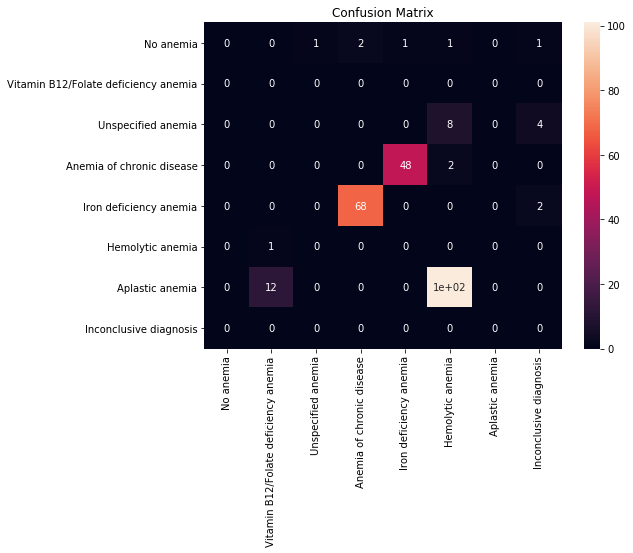

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
plt.ylabel('Actual Anemia')
plt.xlabel('Predicted Anemia')
ax = sns.heatmap(cm_df, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [19]:
def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_actual, y_pred)
    cm_df = pd.DataFrame(cm, index = list(constants.CLASS_DICT.keys()), columns = list(constants.CLASS_DICT.keys()))
    #cm_df = pd.DataFrame(cm, index = list(constants.CLASS_DICT.keys()), columns = list(constants.CLASS_DICT.keys()))
    plt.figure(figsize=(8, 6))
    ax=sns.heatmap(cm_df, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Anemia')
    plt.xlabel('Predicted Anemia')
    #plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()
    #plt.close()

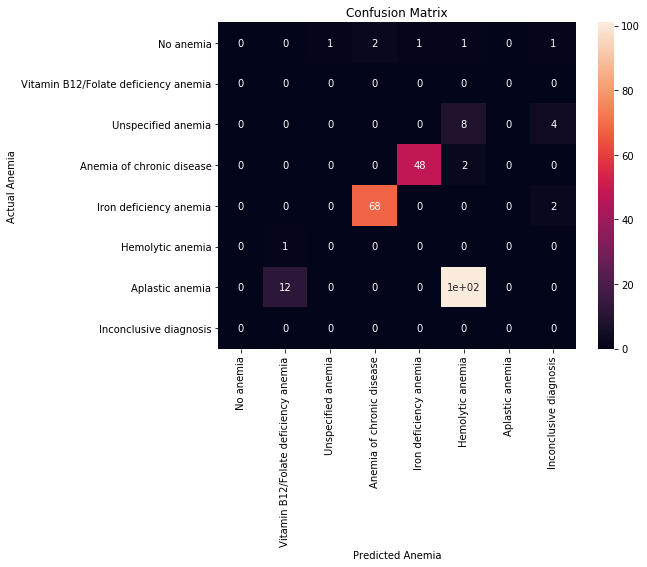

In [20]:
plot_confusion_matrix(better_dqn_df['y_actual'], better_dqn_df['dt_y_pred'])

In [21]:
better_dqn_df[better_dqn_df.y_actual==2].trajectory.value_counts()

['hemoglobin', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']              9
['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']    3
Name: trajectory, dtype: int64

#### Episodes where DT agent is better than DQN

In [22]:
better_dt_df = test_df[(test_df.y_actual!=test_df.dqn_y_pred) & (test_df.y_actual==test_df.dt_y_pred)]
better_dt_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,dqn_y_pred,dt_y_pred
6,5.0,6.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'ret_count', 'gender', '...",5.0,7.0,5.0
17,4.0,17.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Anemia of chron...",4.0,3.0,4.0
86,5.0,86.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'ferritin', 'Iro...",3.0,4.0,3.0
117,3.0,117.0,0.0,-1.0,0.0,"['hemoglobin', 'gender', 'No anemia']",3.0,0.0,3.0
142,5.0,142.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'ferritin', 'Iro...",3.0,4.0,3.0


In [23]:
len(better_dt_df)

722

In [24]:
better_dt_df.dt_y_pred.value_counts()

4.0    197
5.0    189
3.0    139
1.0     97
6.0     42
0.0     29
2.0     19
7.0     10
Name: dt_y_pred, dtype: int64

In [25]:
better_dqn_df.dqn_y_pred.value_counts()

6.0    113
4.0     70
3.0     50
2.0     12
0.0      6
5.0      1
Name: dqn_y_pred, dtype: int64

In [26]:
test_df[(test_df.y_actual==2) & (test_df.dqn_y_pred!=2)].dt_y_pred.value_counts()

7.0    486
5.0    116
3.0     51
6.0     47
2.0     19
4.0      4
Name: dt_y_pred, dtype: int64

#### Shorter DQN paths

In [27]:
shorters_df = test_df.copy()
shorters_df = shorters_df.rename({'trajectory':'dqn_trajectory', 'episode_length':'dqn_length'}, axis=1)
shorters_df['dt_trajectory'] = dt_test_df['trajectory']
shorters_df['dt_length'] = dt_test_df['episode_length']
shorters_df = shorters_df.drop(['index', 'reward'], axis=1)
shorters_df['dt_trajectory'] = shorters_df['dt_trajectory'].apply(lambda x: ast.literal_eval(x))
shorters_df['dqn_trajectory'] = shorters_df['dqn_trajectory'].apply(lambda x: ast.literal_eval(x))
shorters_df.head()

,dqn_length,is_success,terminated,dqn_trajectory,y_actual,dqn_y_pred,dt_y_pred,dt_trajectory,dt_length
0,4.0,1.0,0.0,"[hemoglobin, mcv, segmented_neutrophils, Vitam...",1.0,1.0,1.0,"[hemoglobin, mcv, segmented_neutrophils, Vitam...",4.0
1,4.0,0.0,0.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",5.0,6.0,6.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",4.0
2,5.0,1.0,0.0,"[hemoglobin, gender, mcv, tibc, Anemia of chro...",3.0,3.0,3.0,"[hemoglobin, gender, mcv, ferritin, tibc, Anem...",6.0
3,4.0,0.0,1.0,"[hemoglobin, mcv, segmented_neutrophils, Incon...",2.0,7.0,7.0,"[hemoglobin, mcv, segmented_neutrophils, Incon...",4.0
4,4.0,0.0,1.0,"[hemoglobin, mcv, segmented_neutrophils, Incon...",0.0,7.0,7.0,"[hemoglobin, mcv, segmented_neutrophils, Incon...",4.0


In [28]:
shorters_dqn_df = pd.DataFrame()
for i, row in shorters_df.iterrows():
    if len(row.dqn_trajectory) < len(row.dt_trajectory):
        #if row.dqn_y_pred == row.y_actual:
        shorters_dqn_df = shorters_dqn_df.append(row)
shorters_dqn_df.head()

,dqn_length,dqn_trajectory,dqn_y_pred,dt_length,dt_trajectory,dt_y_pred,is_success,terminated,y_actual
2,5.0,"[hemoglobin, gender, mcv, tibc, Anemia of chro...",3.0,6.0,"[hemoglobin, gender, mcv, ferritin, tibc, Anem...",3.0,1.0,0.0,3.0
7,4.0,"[hemoglobin, mcv, tibc, Inconclusive diagnosis]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,0.0,1.0,5.0
26,4.0,"[hemoglobin, mcv, tibc, Anemia of chronic dise...",3.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Anemia of ch...",3.0,0.0,0.0,4.0
33,4.0,"[hemoglobin, mcv, tibc, Anemia of chronic dise...",3.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Anemia of ch...",3.0,1.0,0.0,3.0
49,4.0,"[hemoglobin, mcv, tibc, Anemia of chronic dise...",3.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Anemia of ch...",3.0,1.0,0.0,3.0


In [29]:
# assert shorters_dqn_df.y_actual.tolist() == shorters_dqn_df.dqn_y_pred.tolist()

In [30]:
def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_actual, y_pred)
    cm_df = pd.DataFrame(cm, index = list(constants.CLASS_DICT.keys()), columns = list(constants.CLASS_DICT.keys()))
    #cm_df = pd.DataFrame(cm, index = list(constants.CLASS_DICT.keys()), columns = list(constants.CLASS_DICT.keys()))
    plt.figure(figsize=(8, 6))
    ax=sns.heatmap(cm_df, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Anemia')
    plt.xlabel('Predicted Anemia')
    #plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()
    #plt.close()

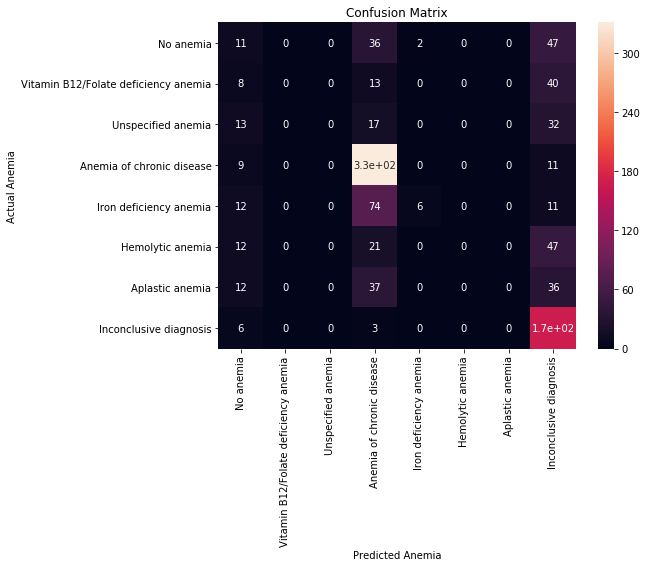

In [31]:
plot_confusion_matrix(shorters_dqn_df['y_actual'], shorters_dqn_df['dqn_y_pred'])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

../..\modules\many_features\utils.py:338: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:339: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.

../..\modules\many_features\utils.py:341: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:342: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.



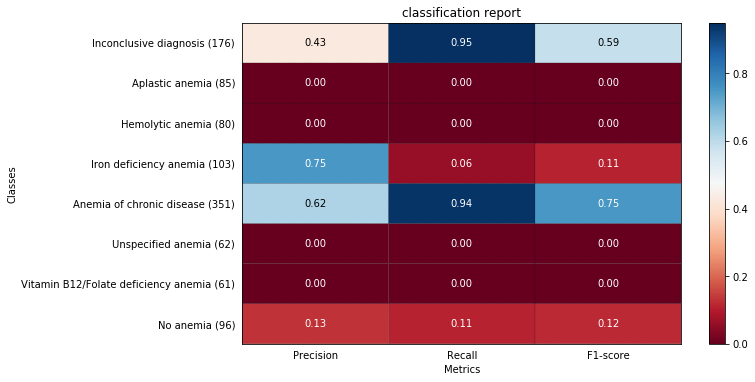

In [32]:
utils.plot_classification_report(shorters_dqn_df['y_actual'], shorters_dqn_df['dqn_y_pred'])

In [33]:
shorters_dqn_df.dqn_y_pred.value_counts()

3.0    532
7.0    391
0.0     83
4.0      8
Name: dqn_y_pred, dtype: int64

In [34]:
shorters_dqn_df[shorters_dqn_df.dqn_y_pred == shorters_dqn_df.y_actual].dqn_y_pred.value_counts()

3.0    331
7.0    167
0.0     11
4.0      6
Name: dqn_y_pred, dtype: int64

In [ ]:
shorter_dqn_df_1 = shorters_dqn_df[shorters_dqn_df.dqn_y_pred==7]
shorter_dqn_df_1.head()

In [ ]:
shorter_dqn_df_1.tail()

In [ ]:
len(shorter_dqn_df_1)

In [ ]:
shorter_dqn_df_1.dqn_length.unique()

In [ ]:
cols = ['hemoglobin', 'mcv', 'ferritin', 'tibc']
X_test_df.iloc[shorter_dqn_df_1.index][cols].describe()

In [ ]:
X_test_df.iloc[17]

In [ ]:
shorter_dqn_df_1.tail()

In [ ]:
shorter_dqn_df_1[shorter_dqn_df_1.dqn_length==5]

In [ ]:
shorter_dqn_df_1.dqn_length.unique()

In [ ]:
# shorter_dqn_df_1[shorter_dqn_df_1.dqn_length==4].dt_length.unique()

In [ ]:
X_test_df.iloc[shorter_dqn_df_1.index].describe()

In [ ]:
analytics_test_df =shorter_dqn_df_1[shorter_dqn_df_1.dqn_length==3]
analytics_test_df.head()

In [ ]:
index_list = list(analytics_test_df.index)
analytics_x_test_df = X_test_df.iloc[index_list]
analytics_x_test_df.describe()

In [ ]:
shorter_dqn_df_1.dqn_trajectory.value_counts()